In [57]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

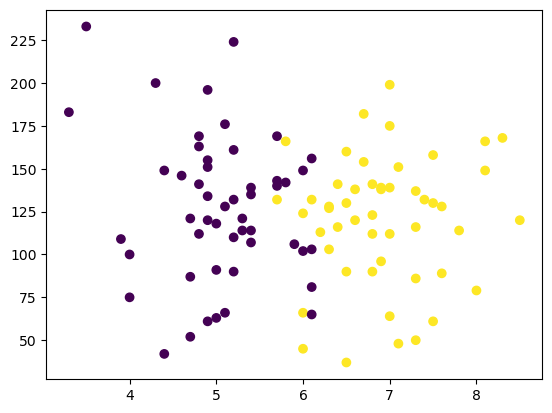

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_Test=train_test_split(X,Y,test_size=0.1)

In [21]:
X_train

,cgpa,iq
25,5.0,91.0
34,4.8,163.0
21,7.1,151.0
63,6.3,128.0
45,6.0,66.0
...,...,...
31,3.9,109.0
6,5.7,143.0
71,6.1,132.0
22,4.9,120.0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [69]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_test

array([[ 0.03771667, -0.53841547],
       [ 0.90810128,  0.38529577],
       [ 0.03771667, -1.43716153],
       [-0.91970641,  0.68487779],
       [-1.00674487,  1.13425082],
       [-0.13636026,  0.46019127],
       [ 1.86552436,  0.63494745],
       [ 0.29883205,  0.11067891],
       [ 0.73402436,  0.4352261 ],
       [ 1.16921667, -1.83660422]])

In [38]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf=LogisticRegression()

In [71]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [72]:
y_pred=clf.predict(X_test)

In [73]:
Y_Test

62    0
32    1
45    1
89    0
75    0
4     0
37    1
63    1
43    1
77    1
Name: placement, dtype: int64

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_Test,y_pred)

0.9

In [76]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

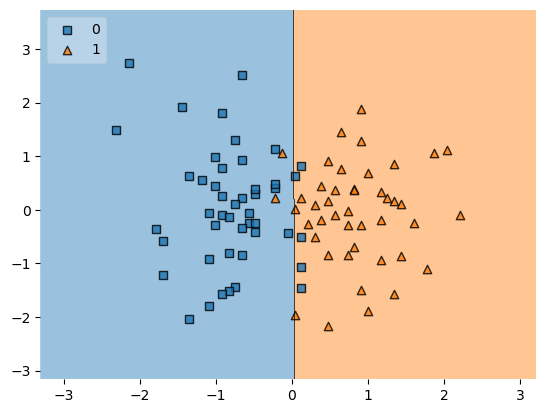

In [79]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [64]:
import pickle

In [65]:
pickle.dump(clf,open('model.pkl','wb'))